## Compare Forecasts

In [1]:
using COVIDResourceAllocation: forecast

In [3]:
using DataFrames, CSV
using Dates
using Gadfly

## Admitted Patients

In [4]:
states = ["MA", "MD", "ME", "NH", "NY", "RI"]
# states = ["CT", "DE", "MA", "MD", "ME", "NH", "NJ", "NY", "PA", "RI", "VT"]

start_date = Date(2020, 5, 1)
end_date   = Date(2020, 6, 1)

patient_type = :regular;

In [5]:
forecast_admitted_ihme = forecast(
    states, start_date, end_date,
    level=:state,
    source=:ihme,
    forecast_type=:admitted,
    patient_type=patient_type,
    bound_type=:mean,
);
forecast_admitted_ihme_lb = forecast(
    states, start_date, end_date,
    level=:state,
    source=:ihme,
    forecast_type=:admitted,
    patient_type=patient_type,
    bound_type=:lb,
);
forecast_admitted_ihme_ub = forecast(
    states, start_date, end_date,
    level=:state,
    source=:ihme,
    forecast_type=:admitted,
    patient_type=patient_type,
    bound_type=:ub,
);

forecast_admitted_columbia = forecast(
    states, start_date, end_date,
    level=:state,
    source=:columbia,
    forecast_type=:admitted,
    patient_type=patient_type,
    bound_type=:mean,
);
forecast_admitted_columbia_lb = forecast(
    states, start_date, end_date,
    level=:state,
    source=:columbia,
    forecast_type=:admitted,
    patient_type=patient_type,
    bound_type=:lb,
);
forecast_admitted_columbia_ub = forecast(
    states, start_date, end_date,
    level=:state,
    source=:columbia,
    forecast_type=:admitted,
    patient_type=patient_type,
    bound_type=:ub,
);

forecast_admitted_gt = forecast(
    states, start_date, end_date,
    level=:state,
    source=:gt,
    forecast_type=:admitted,
    patient_type=patient_type,
    bound_type=:mean,
);

In [6]:
# gtdf = DataFrame(Dict(states[s] => forecast_admitted_gt[s,:] for s in 1:length(states)))
# insertcols!(gtdf, 1, :date => start_date:Day(1):end_date)

In [7]:
forecast_admitted_ihme_total = sum(forecast_admitted_ihme, dims=1)
forecast_admitted_ihme_total_lb = sum(forecast_admitted_ihme_lb, dims=1)
forecast_admitted_ihme_total_ub = sum(forecast_admitted_ihme_ub, dims=1)

forecast_admitted_columbia_total = sum(forecast_admitted_columbia, dims=1)
forecast_admitted_columbia_total_lb = sum(forecast_admitted_columbia_lb, dims=1)
forecast_admitted_columbia_total_ub = sum(forecast_admitted_columbia_ub, dims=1)

forecast_admitted_gt_total = sum(forecast_admitted_gt, dims=1);

In [8]:
state = "NY"
loc = findfirst(s -> s == state, states)

forecast_admitted_ihme_single = forecast_admitted_ihme[loc,:]
forecast_admitted_ihme_single_lb = forecast_admitted_ihme_lb[loc,:]
forecast_admitted_ihme_single_ub = forecast_admitted_ihme_ub[loc,:]

forecast_admitted_columbia_single = forecast_admitted_columbia[loc,:]
forecast_admitted_columbia_single_lb = forecast_admitted_columbia_lb[loc,:]
forecast_admitted_columbia_single_ub = forecast_admitted_columbia_ub[loc,:]

forecast_admitted_gt_single = forecast_admitted_gt[loc,:];

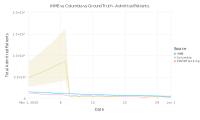

In [9]:
colors = Scale.default_discrete_colors(3)

plt_ihme = layer(
    x=start_date:Day(1):end_date,
    y=forecast_admitted_ihme_total, ymin=forecast_admitted_ihme_total_lb, ymax=forecast_admitted_ihme_total_ub,
    Geom.line, Geom.ribbon,
    Theme(default_color=colors[1], alphas=[0.4])
)

plt_columbia = layer(
    x=start_date:Day(1):end_date,
    y=forecast_admitted_columbia_total, ymin=forecast_admitted_columbia_total_lb, ymax=forecast_admitted_columbia_total_ub,
    Geom.line, Geom.ribbon,
    Theme(default_color=colors[2], alphas=[0.4])
)

plt_gt = layer(
    x=start_date:Day(1):end_date,
    y=forecast_admitted_gt_total,
    Geom.line,
    Theme(default_color=colors[3], alphas=[0.4])
)

plt = Gadfly.plot(
    plt_ihme,
    plt_columbia,
    plt_gt,
    Guide.xlabel("Date"), Guide.ylabel("Total Admitted Patients"), Guide.title("IHME vs Columbia vs Ground Truth - Admitted Patients"),
    Guide.manual_color_key("Source", ["IHME", "Columbia", "COVIDTracking"], [colors[1], colors[2], colors[3]]),
)
plt |> SVG(20cm, 12cm)

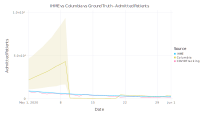

In [10]:
colors = Scale.default_discrete_colors(3)

plt_ihme = layer(
    x=start_date:Day(1):end_date,
    y=forecast_admitted_ihme_single, ymin=forecast_admitted_ihme_single_lb, ymax=forecast_admitted_ihme_single_ub,
    Geom.line, Geom.ribbon,
    Theme(default_color=colors[1], alphas=[0.4])
)

plt_columbia = layer(
    x=start_date:Day(1):end_date,
    y=forecast_admitted_columbia_single, ymin=forecast_admitted_columbia_single_lb, ymax=forecast_admitted_columbia_single_ub,
    Geom.line, Geom.ribbon,
    Theme(default_color=colors[2], alphas=[0.4])
)

plt_gt = layer(
    x=start_date:Day(1):end_date,
    y=forecast_admitted_gt_single,
    Geom.line,
    Theme(default_color=colors[3], alphas=[0.4])
)

plt = Gadfly.plot(
    plt_ihme,
    plt_columbia,
    plt_gt,
    Guide.xlabel("Date"), Guide.ylabel("Admitted Patients"), Guide.title("IHME vs Columbia vs Ground Truth - Admitted Patients"),
    Guide.manual_color_key("Source", ["IHME", "Columbia", "COVIDTracking"], [colors[1], colors[2], colors[3]]),
)
plt |> SVG(20cm, 12cm)

## Active Patients

In [11]:
states = ["CT", "DE", "MA", "MD", "ME", "NH", "NJ", "NY", "PA", "RI", "VT"]

start_date = Date(2020, 5, 1)
end_date   = Date(2020, 6, 1)

patient_type = :regular;

In [12]:
forecast_active_ihme = forecast(
    states, start_date, end_date,
    level=:state,
    source=:ihme,
    forecast_type=:active,
    patient_type=patient_type,
    bound_type=:mean,
);
forecast_active_ihme_lb = forecast(
    states, start_date, end_date,
    level=:state,
    source=:ihme,
    forecast_type=:active,
    patient_type=patient_type,
    bound_type=:lb,
);
forecast_active_ihme_ub = forecast(
    states, start_date, end_date,
    level=:state,
    source=:ihme,
    forecast_type=:active,
    patient_type=patient_type,
    bound_type=:ub,
);

forecast_active_gt = forecast(
    states, start_date, end_date,
    level=:state,
    source=:gt,
    forecast_type=:active,
    patient_type=patient_type,
    bound_type=:mean,
);
forecast_active_gt_lb = forecast(
    states, start_date, end_date,
    level=:state,
    source=:gt,
    forecast_type=:active,
    patient_type=patient_type,
    bound_type=:lb,
);
forecast_active_gt_ub = forecast(
    states, start_date, end_date,
    level=:state,
    source=:gt,
    forecast_type=:active,
    patient_type=patient_type,
    bound_type=:ub,
);

In [13]:
forecast_active_ihme_total = sum(forecast_active_ihme, dims=1)
forecast_active_ihme_total_lb = sum(forecast_active_ihme_lb, dims=1)
forecast_active_ihme_total_ub = sum(forecast_active_ihme_ub, dims=1)

forecast_active_gt_total = sum(forecast_active_gt, dims=1)
forecast_active_gt_total_lb = sum(forecast_active_gt_lb, dims=1)
forecast_active_gt_total_ub = sum(forecast_active_gt_ub, dims=1);

In [14]:
state = "CT"
loc = findfirst(s -> s == state, states)

forecast_active_ihme_single = forecast_active_ihme[loc,:]
forecast_active_ihme_single_lb = forecast_active_ihme_lb[loc,:]
forecast_active_ihme_single_ub = forecast_active_ihme_ub[loc,:]

forecast_active_gt_single = forecast_active_gt[loc,:]
forecast_active_gt_single_lb = forecast_active_gt_lb[loc,:]
forecast_active_gt_single_ub = forecast_active_gt_ub[loc,:];

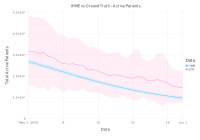

In [15]:
colors = Scale.default_discrete_colors(3)

plt_ihme = layer(
    x=start_date:Day(1):end_date,
    y=forecast_active_ihme_total, ymin=forecast_active_ihme_total_lb, ymax=forecast_active_ihme_total_ub,
    Geom.line, Geom.ribbon,
    Theme(default_color=colors[1], alphas=[0.4])
)

plt_gt = layer(
    x=start_date:Day(1):end_date,
    y=forecast_active_gt_total, ymin=forecast_active_gt_total_lb, ymax=forecast_active_gt_total_ub,
    Geom.line, Geom.ribbon,
    Theme(default_color=colors[3], alphas=[0.4])
)

plt = Gadfly.plot(
    plt_ihme,
    plt_gt,
    Guide.xlabel("Date"), Guide.ylabel("Total Active Patients"), Guide.title("IHME vs Ground Truth - Active Patients"),
    Guide.manual_color_key("Data", ["IHME", "CDC"], [colors[1], colors[3]]),
)
plt |> SVG(20cm, 14cm)

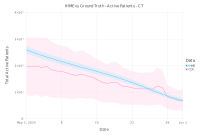

In [16]:
colors = Scale.default_discrete_colors(3)

plt_ihme = layer(
    x=start_date:Day(1):end_date,
    y=forecast_active_ihme_single, ymin=forecast_active_ihme_single_lb, ymax=forecast_active_ihme_single_ub,
    Geom.line, Geom.ribbon,
    Theme(default_color=colors[1], alphas=[0.4])
)

plt_gt = layer(
    x=start_date:Day(1):end_date,
    y=forecast_active_gt_single, ymin=forecast_active_gt_single_lb, ymax=forecast_active_gt_single_ub,
    Geom.line, Geom.ribbon,
    Theme(default_color=colors[3], alphas=[0.4])
)

plt = Gadfly.plot(
    plt_ihme,
    plt_gt,
    Guide.xlabel("Date"), Guide.ylabel("Total Active Patients"), Guide.title("IHME vs Ground Truth - Active Patients - $(states[loc])"),
    Guide.manual_color_key("Data", ["IHME", "CDC"], [colors[1], colors[3]]),
)
plt |> SVG(20cm, 14cm)